### Energy Efficiency of Buildings
 *We perform energy analysis using 12 different building shapes. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict heating and cooling value responses.*
1. Loading Libraries and Data
2. Data Summary 
3. Duplicate, Missing and Outlier Data Detection
4. Multiple Linear Regression
5. Polynomial Regression
6. Support Vector Machine Regression
7. Decision Tree Regression
8. Random Forest Regression 
9. Conclusion





#### 1.Loading Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVR
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df=pd.read_csv('ENB2012_data.csv')

#### 2.Data Summary

In [3]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative_Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface_Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall_Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof_Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall_Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing_Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing_Area_Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating_Load,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Cooling_Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


#### 3.Duplicate, Missing and Outlier Data Detection

In [6]:
df.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [7]:
sum(df.duplicated())

0

In [8]:
def Outlier_Detect_SDM(dataframe):
    Outlier_data_index = []
    for a in dataframe.columns:
        std = dataframe[a].std()
        mean = dataframe[a].mean()
        
        lower_limit =mean - std*3
        upper_limit =mean + std*3
        
        for outlier in dataframe[a].values:
            if outlier > upper_limit or outlier < lower_limit:
                anomalies.append(dataframe.index[dataframe[a]==outlier].tolist())
    return Outlier_data_index

In [9]:
Outlier_Detect_SDM(df)

[]

#### 4.Multiple Linear Regression

In [10]:
X = df.iloc[:,:-2]
y = df[["Heating_Load","Cooling_Load"]]

In [11]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.32 , random_state =25)

In [12]:
mlr=LinearRegression()
mlr.fit(x_train, y_train)
y_pred = mlr.predict(x_test)

In [13]:
all_errors = pd.DataFrame(columns=["Method",'MAE', 'MSE', 'RMSE',"R-Squared"])

Results of Multiple Linear Regression sklearn.metrics
MAE:       2.139
MSE:       9.334
RMSE:      3.055
R-Squared: 0.903


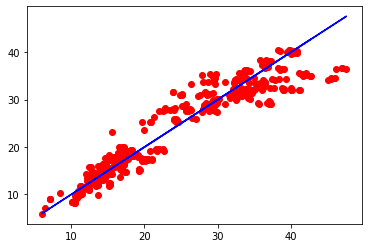

In [14]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(y_test,y_pred)

plt.scatter(y_test,y_pred,color='red')
plt.plot(y_test,y_test,color='blue')

all_errors = all_errors.append({'Method' : 'Multiple Linear', 'MAE' : mae, 'MSE' : mse, 'RMSE' : rmse, 'R-Squared' : r2},ignore_index = True)


print("Results of Multiple Linear Regression sklearn.metrics")
print("MAE:      ",round(mae,3))
print("MSE:      ", round(mse,3))
print("RMSE:     ", round(rmse,3))
print("R-Squared:", round(r2,3))

In [15]:
X_ols = sm.add_constant(X)
model = sm.OLS(endog=y[["Heating_Load"]],exog= X_ols[["const","Relative_Compactness","Surface_Area","Wall_Area","Roof_Area","Overall_Height","Orientation","Glazing_Area","Glazing_Area_Distribution"]] ).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Heating_Load   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1187.
Date:                Mon, 31 Jan 2022   Prob (F-statistic):               0.00
Time:                        03:01:07   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     760   BIC:                             3878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

##### p-value of Orientation is higher 0.05. Drop Orientation column using Backward Elimination Method.

In [16]:
X_ols = sm.add_constant(X)
model = sm.OLS(endog=y[["Heating_Load"]],exog= X_ols[["const","Relative_Compactness","Surface_Area","Wall_Area","Roof_Area","Overall_Height","Glazing_Area","Glazing_Area_Distribution"]] ).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Heating_Load   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1387.
Date:                Mon, 31 Jan 2022   Prob (F-statistic):               0.00
Time:                        03:01:07   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3839.
Df Residuals:                     761   BIC:                             3871.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### 5.Polynomial Regression


In [17]:
poly_reg = PolynomialFeatures(degree=3, include_bias=False)
x_poly = poly_reg.fit_transform(X)

In [18]:
x_train , x_test , y_train , y_test = train_test_split(x_poly, y, test_size=0.32 , random_state =61)

In [19]:
poly_linreg = LinearRegression()
poly_linreg.fit(x_train,y_train)
y_pred = poly_linreg.predict(x_test)

Results of Polynomial Regression sklearn.metrics
MAE:       0.955
MSE:       2.03
RMSE:      1.425
R-Squared: 0.978


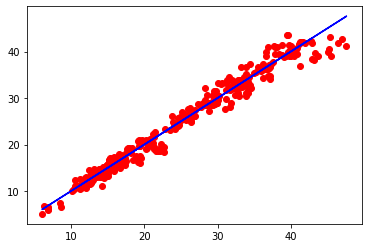

In [20]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(y_test,y_pred)

plt.scatter(y_test,y_pred,color='red')
plt.plot(y_test,y_test,color='blue')

all_errors = all_errors.append({'Method' : 'Polynomial', 'MAE' : mae, 'MSE' : mse, 'RMSE' : rmse, 'R-Squared' : r2},ignore_index = True)

print("Results of Polynomial Regression sklearn.metrics")
print("MAE:      ",round(mae,3))
print("MSE:      ", round(mse,3))
print("RMSE:     ", round(rmse,3))
print("R-Squared:", round(r2,3))

#### 6.Support Vector Machine Regression

In [21]:
X = df.iloc[:,:-2].values
y= df[["Heating_Load"]].values

x_train, x_test, y_train, y_test  = train_test_split(X, y, test_size=0.28, random_state=0)

In [22]:
X_sc = StandardScaler()
y_sc = StandardScaler()
x_train = X_sc.fit_transform(x_train)
y_train = y_sc.fit_transform(y_train).ravel()

In [23]:
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

SVR()

In [24]:
y_pred = regressor.predict(X_sc.transform(x_test))
y_pred= y_pred.reshape((len(y_pred), 1))
y_pred = y_sc.inverse_transform(y_pred)

Results of Support Vector Machine Regression sklearn.metrics
MAE:       1.512
MSE:       5.232
RMSE:      2.287
R-Squared: 0.95


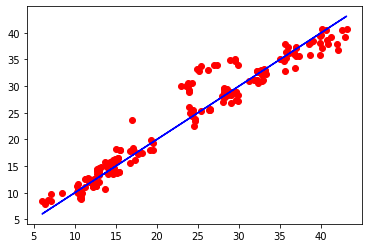

In [25]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(y_test,y_pred)

plt.scatter(y_test,y_pred,color='red')
plt.plot(y_test,y_test,color='blue')

all_errors = all_errors.append({'Method' : 'SVM', 'MAE' : mae, 'MSE' : mse, 'RMSE' : rmse, 'R-Squared' : r2},ignore_index = True)

print("Results of Support Vector Machine Regression sklearn.metrics")
print("MAE:      ",round(mae,3))
print("MSE:      ", round(mse,3))
print("RMSE:     ", round(rmse,3))
print("R-Squared:", round(r2,3))

#### 7.Decision Tree Regression

In [26]:
X = df.iloc[:,:-2].values
y = df[["Heating_Load","Cooling_Load"]].values

x_train, x_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state=0)

In [27]:
dt_reg = DecisionTreeRegressor(max_depth=4)
dt_reg.fit(x_train,y_train)
y_pred=dt_reg.predict(x_test)

Results of Decision Tree Regression sklearn.metrics
MAE:       1.448
MSE:       3.962
RMSE:      1.99
R-Squared: 0.959


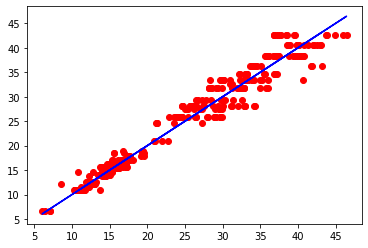

In [28]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y_test,y_pred)

plt.scatter(y_test,y_pred,color='red')
plt.plot(y_test,y_test,color='blue')

all_errors = all_errors.append({'Method' : 'Decision Tree', 'MAE' : mae, 'MSE' : mse, 'RMSE' : rmse, 'R-Squared' : r2},ignore_index = True)

print("Results of Decision Tree Regression sklearn.metrics")
print("MAE:      ",round(mae,3))
print("MSE:      ", round(mse,3))
print("RMSE:     ", round(rmse,3))
print("R-Squared:", round(r2,3))

#### 8.Random Forest Regression 

In [29]:
X = df.iloc[:,:-2].values
y = df[["Heating_Load","Cooling_Load"]].values


x_train, x_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state=0)

In [30]:
rfr_reg = RandomForestRegressor(n_estimators=8,max_depth=4,bootstrap=True)
rfr_reg.fit(x_train,y_train)
y_pred = rfr_reg.predict(x_test)

Results of Random Forest Regression  sklearn.metrics
MAE:       1.325
MSE:       3.343
RMSE:      1.828
R-Squared: 0.965


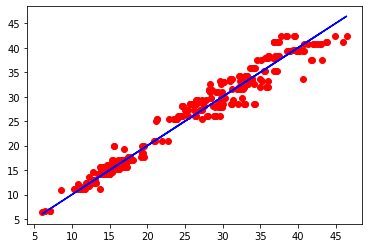

In [31]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y_test,y_pred)

plt.scatter(y_test,y_pred,color='red')
plt.plot(y_test,y_test,color='blue')

all_errors = all_errors.append({'Method' : 'Random Forest', 'MAE' : mae, 'MSE' : mse, 'RMSE' : rmse, 'R-Squared' : r2},ignore_index = True)


print("Results of Random Forest Regression  sklearn.metrics")
print("MAE:      ",round(mae,3))
print("MSE:      ", round(mse,3))
print("RMSE:     ", round(rmse,3))
print("R-Squared:", round(r2,3))

#### 9.Conclusion

In [32]:
round(all_errors,3)

,Method,MAE,MSE,RMSE,R-Squared
0,Multiple Linear,2.139,9.334,3.055,0.903
1,Polynomial,0.955,2.030,1.425,0.978
2,SVM,1.512,5.232,2.287,0.950
3,Decision Tree,1.448,3.962,1.990,0.959
4,Random Forest,1.325,3.343,1.828,0.965


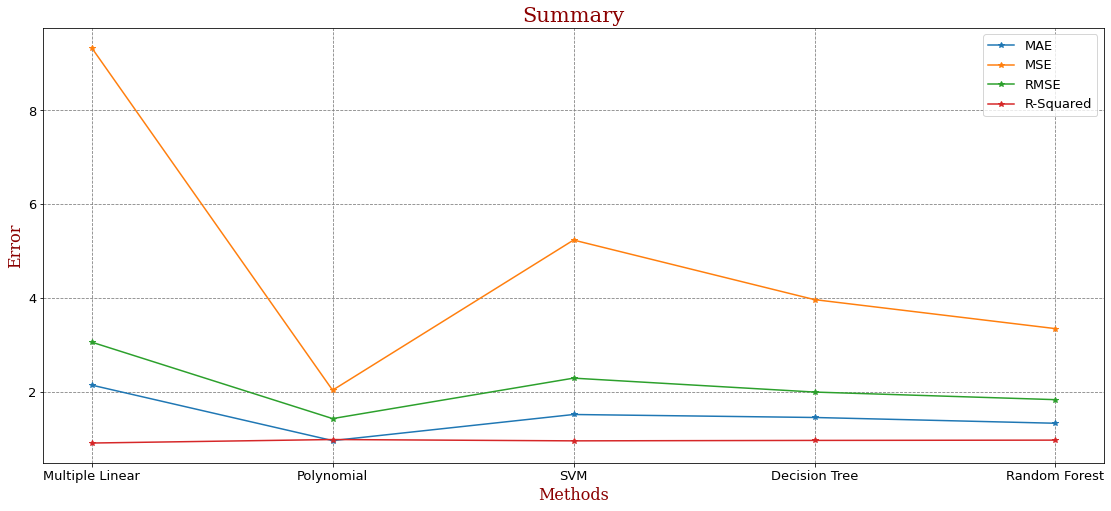

In [33]:
font = {'family':'serif','color':'darkred','size':21}
font1 = {'family':'serif','color':'darkred','size':16}

plt.figure(figsize=(19,8))
plt.xlabel("Methods" , fontdict = font1)
plt.ylabel("Error" , fontdict = font1)
plt.title("Summary", fontdict = font)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.8)
plt.xticks(size = 13)
plt.yticks(size = 13)



plt.plot(all_errors["Method"],all_errors["MAE"],marker = '*',label ='MAE')
plt.plot(all_errors["Method"],all_errors["MSE"],marker = '*',label ='MSE')
plt.plot(all_errors["Method"],all_errors["RMSE"],marker = '*',label ='RMSE')
plt.plot(all_errors["Method"],all_errors["R-Squared"],marker = '*',label ='R-Squared')
plt.legend(prop={'size': 13})


#### After completion of prediction models, it can be easily seen above graph that Random Forest Regression and Polynomial Regression give us the best results.